In [1]:
import pandas as pd 
from clear_txt import *
from data_path import *
from to_chart import *

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ademoguzhanozdemir/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df=migros_raw_products

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15387 entries, 298 to 2499
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uMarka                 15387 non-null  object 
 1   urunKategorileri       15387 non-null  object 
 2   urunKategorileriTwo    15385 non-null  object 
 3   urunKategorileriThree  14945 non-null  object 
 4   urunKategorileriFour   8745 non-null   object 
 5   urunKategorileriFive   7 non-null      object 
 6   urunKategorileriSix    0 non-null      float64
 7   urunKategorileriSeven  0 non-null      float64
 8   urunAdi                15385 non-null  object 
 9   urunAciklama           12935 non-null  object 
 10  urunFoto               15387 non-null  object 
 11  urunURL                15385 non-null  object 
 12  Unnamed: 8             0 non-null      float64
dtypes: float64(3), object(10)
memory usage: 1.6+ MB


## Null Marka ve Ürün Adlarını Temizledim


In [4]:
df = df.dropna(subset=['uMarka'])
df = df.dropna(subset=['urunAdi'])

In [5]:
df.isnull().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15385 entries, 298 to 2499
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   uMarka                 15385 non-null  bool 
 1   urunKategorileri       15385 non-null  bool 
 2   urunKategorileriTwo    15385 non-null  bool 
 3   urunKategorileriThree  15385 non-null  bool 
 4   urunKategorileriFour   15385 non-null  bool 
 5   urunKategorileriFive   15385 non-null  bool 
 6   urunKategorileriSix    15385 non-null  bool 
 7   urunKategorileriSeven  15385 non-null  bool 
 8   urunAdi                15385 non-null  bool 
 9   urunAciklama           15385 non-null  bool 
 10  urunFoto               15385 non-null  bool 
 11  urunURL                15385 non-null  bool 
 12  Unnamed: 8             15385 non-null  bool 
dtypes: bool(13)
memory usage: 315.5 KB


## Unnamed Kolonunu Sildim

In [6]:
del df['Unnamed: 8']

### Unique Kategorilere Bakalım

In [7]:
df.nunique()

uMarka                    1394
urunKategorileri            14
urunKategorileriTwo         88
urunKategorileriThree      421
urunKategorileriFour       563
urunKategorileriFive         3
urunKategorileriSix          0
urunKategorileriSeven        0
urunAdi                  15209
urunAciklama             12153
urunFoto                 15077
urunURL                  15219
dtype: int64

#### 10 Ana Kategori Olması Gerekirken 14 Gözüküyor. Temizleyelim  

In [8]:
def unique(list1):
    # intilize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
        print (x)

In [9]:
unique(df["urunKategorileri"])


Ev, Pet
Gıda, Şekerleme
İçecek
Kağıt, Kozmetik
Deterjan, Temizlik
Süt, Kahvaltılık
Et, Tavuk, Balık
Bebek, Oyuncak
Guy
Meyve, Sebze
Elektronik
Shoulders
Bugün Eklenenler
Oreal


In [10]:
df[df["urunKategorileri"]=='Elektronik']

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunKategorileriSix,urunKategorileriSeven,urunAdi,urunAciklama,urunFoto,urunURL
4127,Urban Mood,Elektronik,"Aydınlatma, Elektrik Malzemeleri",Masa Lambaları,NaN,NaN,NaN,NaN,Urban Mood Dekoratif Led Işık Kavanoz 10'lu - ...,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/urban-mood-dekoratif...
4129,Urban Mood,Elektronik,"Aydınlatma, Elektrik Malzemeleri",Masa Lambaları,NaN,NaN,NaN,NaN,Urban Mood Retro Dekoratif Led Işık Top 4'lü -...,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/urban-mood-retro-dek...
4184,Apple,Elektronik,Telefon Ve Aksesuarları,Telefon,NaN,NaN,NaN,NaN,Iphone 12 Mini 64 Gb Yeşil Cep Telefonu - Migros,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/iphone-12-mini-64-gb...
4194,Snopy,Elektronik,Bilgisayar ve Aksesuarları,Bilgisayar Aksesuarları,NaN,NaN,NaN,NaN,Snopy Sn-gx82 Exodus Siyah 7.1 Usb Surround Ga...,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/snopy-sn-gx82-exodus...
4196,Lg,Elektronik,Görüntü Ve Ses Sistemleri,Televizyon,NaN,NaN,NaN,NaN,Lg 50Nano796 127 Ekran Uhd Nanocell Uydu Smart...,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/lg-50nano796-127-ekr...
4177,Rowell,Elektronik,"Isıtma, Soğutma",Isıtıcılar,NaN,NaN,NaN,NaN,Rowell 2000W Elektrikli Fan Isıtıcı Lq-501 - M...,&lt;p&gt;2020-240V 50Hz 2000W soğuk/ılık/sıcak...,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/rowell-2000w-elektri...
119,i'think,Elektronik,Telefon Ve Aksesuarları,Telefon Aksesuarları,NaN,NaN,NaN,NaN,i'think Şarj Data Kablo 1.2 Metre (Ios Uyumlu)...,"&lt;p&gt;&lt;span style="";color: rgb(117, 117,...",https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/ithink-sarj-data-kab...
2924,Leva,Elektronik,"Aydınlatma, Elektrik Malzemeleri",Masa Lambaları,NaN,NaN,NaN,NaN,Işık 100'Lü Yılbaşı Süs - Migros,&lt;p&gt;&lt;strong&gt;Işıklı 100';lü Yılbaşı ...,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/isik-100lu-yilbasi-s...
4128,Urban Mood,Elektronik,"Aydınlatma, Elektrik Malzemeleri",Masa Lambaları,NaN,NaN,NaN,NaN,Urban Mood Disco Led Işık 10'lu - Migros,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/urban-mood-disco-led...
4195,Everest,Elektronik,Bilgisayar ve Aksesuarları,Bilgisayar Aksesuarları,NaN,NaN,NaN,NaN,Everest Sm-Gx7 Usb Siyah 7 Tuşlu Oyuncu Mouse ...,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/everest-sm-gx7-usb-s...


### Yanlış Eklenen Kategori Az Olduğu İçin Sildim

In [11]:
df.drop(df[df["urunKategorileri"]=='Oreal'].index, inplace = True) 
df.drop(df[df["urunKategorileri"]=='Guy'].index, inplace = True) 
df.drop(df[df["urunKategorileri"]=='Shoulders'].index, inplace = True) 
df.drop(df[df["urunKategorileri"]=='Bugün Eklenenler'].index, inplace = True) 

In [12]:
df.nunique()

uMarka                    1388
urunKategorileri            10
urunKategorileriTwo         87
urunKategorileriThree      420
urunKategorileriFour       558
urunKategorileriFive         1
urunKategorileriSix          0
urunKategorileriSeven        0
urunAdi                  15065
urunAciklama             12033
urunFoto                 14933
urunURL                  15075
dtype: int64

In [13]:
df["uMarka"]=df["uMarka"].str.capitalize()

In [14]:
df.describe(include=['O'])

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunAdi,urunAciklama,urunFoto,urunURL
count,15235,15235,15235,14795,8628,4,15235,12804,15235,15233
unique,1387,10,87,420,558,1,15065,12033,14933,15075
top,Reyondan,"Kağıt, Kozmetik",Atıştırmalık,Deodorant,Ruj,M&M's,Palmolive Micellar Care Pamuk Özlü Duş Jeli 75...,"&lt;p&gt;&lt;strong&gt;Bir müşteri, aynı gün i...",https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/elseve-dream-long-mu...
freq,479,3742,1343,254,205,4,2,98,145,2


### Birebir Aynı Olan Satırları Sildim

In [15]:
df.drop_duplicates(keep = False, inplace = True)

In [16]:
df.describe(include=['O'])

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunAdi,urunAciklama,urunFoto,urunURL
count,14919,14919,14919,14479,8506,4,14919,12616,14919,14917
unique,1384,10,87,420,558,1,14907,11951,14775,14917
top,Reyondan,"Kağıt, Kozmetik",Atıştırmalık,Deodorant,Ruj,M&M's,Bin Dokuzyüz Seksen Dört George Orwell - Migros,"&lt;p&gt;&lt;strong&gt;Bir müşteri, aynı gün i...",https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/ecotools-2li-goz-duo...
freq,479,3426,1343,254,189,4,2,98,145,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14919 entries, 298 to 2499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uMarka                 14919 non-null  object 
 1   urunKategorileri       14919 non-null  object 
 2   urunKategorileriTwo    14919 non-null  object 
 3   urunKategorileriThree  14479 non-null  object 
 4   urunKategorileriFour   8506 non-null   object 
 5   urunKategorileriFive   4 non-null      object 
 6   urunKategorileriSix    0 non-null      float64
 7   urunKategorileriSeven  0 non-null      float64
 8   urunAdi                14919 non-null  object 
 9   urunAciklama           12616 non-null  object 
 10  urunFoto               14919 non-null  object 
 11  urunURL                14917 non-null  object 
dtypes: float64(2), object(10)
memory usage: 1.5+ MB


### Ürün Açıklama Kolonunu Düzenleyelim

In [18]:
df["urunAciklama"] = df["urunAciklama"].astype(str).apply(remove_html)

In [19]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth',10000)


In [20]:
df.head(200)

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunKategorileriSix,urunKategorileriSeven,urunAdi,urunAciklama,urunFoto,urunURL
298,Dunlop,"Ev, Pet",Giyim,Kadın Giyim,NaN,NaN,NaN,NaN,Dunlop Baskılı Kadın Eşofman Altı Grimelanj - Migros,"Mağaza stoklarıyla sınırlıdır. Adet fiyatıdır. Tercih ettiğiniz bedeni ürün\nnotuna ekleyebilirsiniz. Tercih ettiğiniz beden mağaza stoklarında mevcut ise,\ntercih ettiğiniz beden teslimi yapılabilecektir. Elyaf\nÖzellikleri:%65 Pamuk - %35&nbsp;Polyester&nbsp; Ebat / Beden: S-M-L-\nXL Renk Seçenekleri: Gri Yıkama Talimatı:&nbsp;30 Derecede Yıkama\nUygundur.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/51264227/51264227-52b01d.jpg,https://www.migros.com.tr/dunlop-baskili-kadin-esofman-alti-grimelanj-p-30e3ae3
2384,Metro,"Gıda, Şekerleme",Atıştırmalık,"Bar, Kaplamalılar",Çikolata Bar,NaN,NaN,NaN,Ülker Metro Mini Çoklu Paket 102 G - Migros,"İşletme Kayıt No TR-34-K-012868 Kullanım\nÖnerileri Buzdolabı dışında, serin ve kuru yerde muhafaza ediniz.\n15-25 °C %20-60 Nem Net Miktar\n(g/ml) 102 Menşei TÜRKİYE İçindekiler ENERJİ\nVE BESİN ÖĞELERİ / NUTRITION INFORMATION (25 g için)* / (Per 25 g)*:\nEnerji/Energy 109 kcal, Yağ/Fat 4.0g, Doymuş yağ/of which Saturates 2.3g,\nKarbonhidrat/Carbohydrate 17g, Şekerler/of which Sugars 17g, Lif/Fibre 0.3g,\nProtein 0.9g, Tuz/Salt 0.08g, ENERJİ VE BESİN ÖĞELERİ / NUTRITION INFORMATION\n(100 g için) / (Per 100 g): Enerji/Energy 437kcal, Yağ/Fat 16g, Doymuş yağ/of\nwhich Saturates 9.2g, Karbonhidrat/Carbohydrate 69g, Şekerler/of which Sugars\n68g, Lif/Fibre 1.2g, Protein 3.6g, Tuz/Salt 0.32g, *Bir adet Ülker Metro Mini\n8,5 g?dır. 1 porsiyon (25g) yaklaşık 3 adet Ülker Albeni Mini ürününe tekabül\neder. / One piece Ülker Metro Mini is 8,5 g. 1 portion (25g) is about 3 pieces\nÜlker Metro Mini. Saklama Koşulları Serin ve Kuru\nortamda muhafaza ediniz Gıda İşletmecisi / Üretici / İthalatçı /\nDağıtıcı PASİFİK TÜKETİM ÜRÜNLERİ SATIŞ VE\nTİC.A.Ş. Ürün Bilgilerini Kullanma Hakkında İnternet\nsitemizde ve online satış kanallarımızda yer alan ürün etiket bilgileri,\nürünün tedarikçisi tarafından Migros Ticaret A.Ş.’ye iletilen en güncel\nbilgilerdir. Ürün etiket bilgileri ile internet sitemiz ve online satış\nkanallarımızda bulunan bilgiler arasında herhangi bir farklılık bulunması\nhalinde sorumluluk tamamen tedarikçi firmaya aittir.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/07034273/07034273-ecae85.JPG,https://www.migros.com.tr/ulker-metro-mini-coklu-paket-102-g-p-6b55a1
570,Tchibo,İçecek,Kahve,Hazır Kahve,NaN,NaN,NaN,NaN,Davidoff Fine Aroma Çözünebilir Kahve 100 G - Migros,"Davidoff Fine Aroma Çözünebilir Kahve , benzersiz aroması\nve yumuşak içimi ile kahve keyfinizi\nkatlayacak.&;nbsp; Kaliteli çekirdekleri ile damağınızda\nyumuşacık bir lezzet bırakan kahvenizi sade ya da sütlü tüketerek, kendi\nstandartlarınızı yaratabilirsiniz.&;nbsp; Kullanım\nÖnerileri Kaynatılıp 1 dk bekletilmiş sıcak suya isteğinize göre 1\nveya 2 tatlı kaşığı ekleyerek karıştırınız. Net Miktar\n(g/ml) 100 Menşei KOLOMBİYA İçindekiler %100\nArabica kahve çekirdeklerinden üretilmiştir. Saklama\nKoşulları Serin ve Kuru ortamda muhafaza ediniz Gıda\nİşletmecisi / Üretici / İthalatçı / Dağıtıcı TCHİBO KAHVE\nMAM.DAĞ.VE PAZ.TİC.LTD.ŞTİ. Ürün Bilgilerini Kullanma\nHakkında İnternet sitemizde ve online satış kanallarımızda yer\nalan ürün etiket bilgileri, ürünün tedarikçisi tarafından Migros Ticaret\nA.Ş.’ye iletilen en güncel bilgilerdir. Ürün etiket bilgileri ile internet\nsitemiz ve online satış kanallarımızda bulunan bilgiler arasında herhangi bir\nfarklılık bulunması halinde sorumluluk tamamen tedarikçi firmaya aittir.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/03231571/03231571-d2615f.jpg,https://www.migros.com.tr/davidoff-fine-aroma-cozunebilir-kahve-100-g-p-314f53
3686,Eksik parça yayınevi,"Ev, Pet","Kitap, Dergi",Yetişkin Kitapları,"F

### En Çok Ürün Hangi Kategoride Bakalım

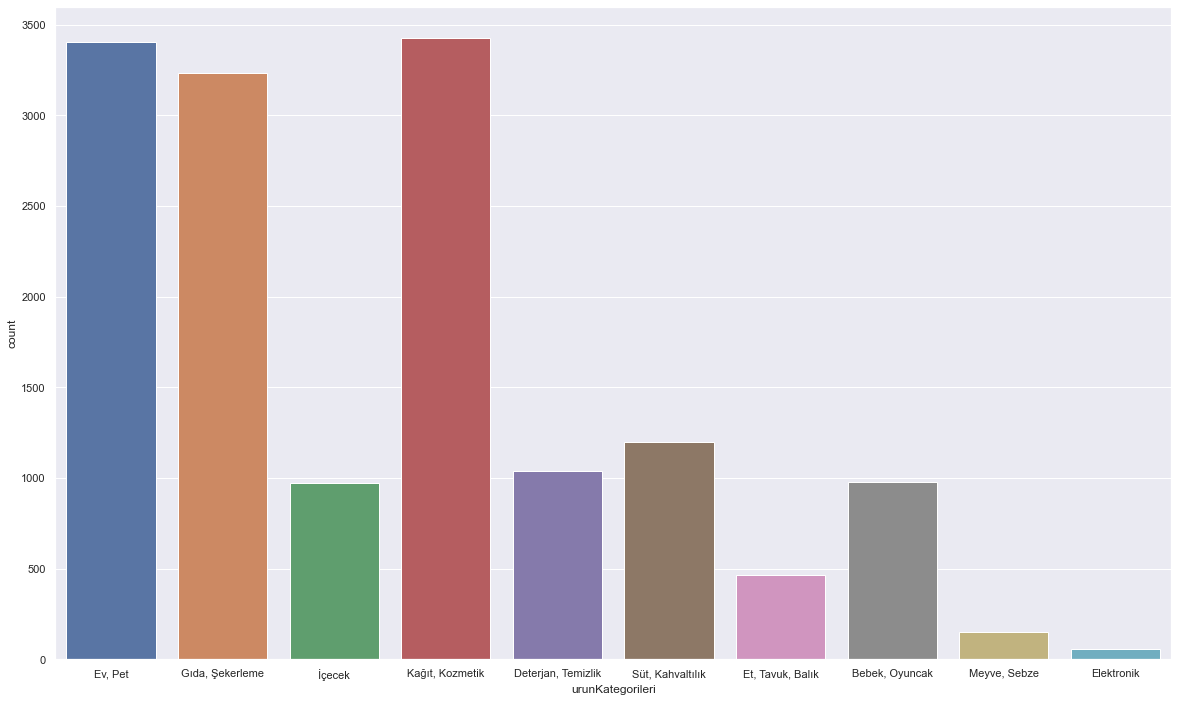

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.figure(figsize=(20, 12))

ax = sns.countplot(x="urunKategorileri", data=df)

In [22]:
kagitKozmetik=df[df["urunKategorileri"] == "Kağıt, Kozmetik"]

### Top 10 Kağıt Kozmetik Markaları

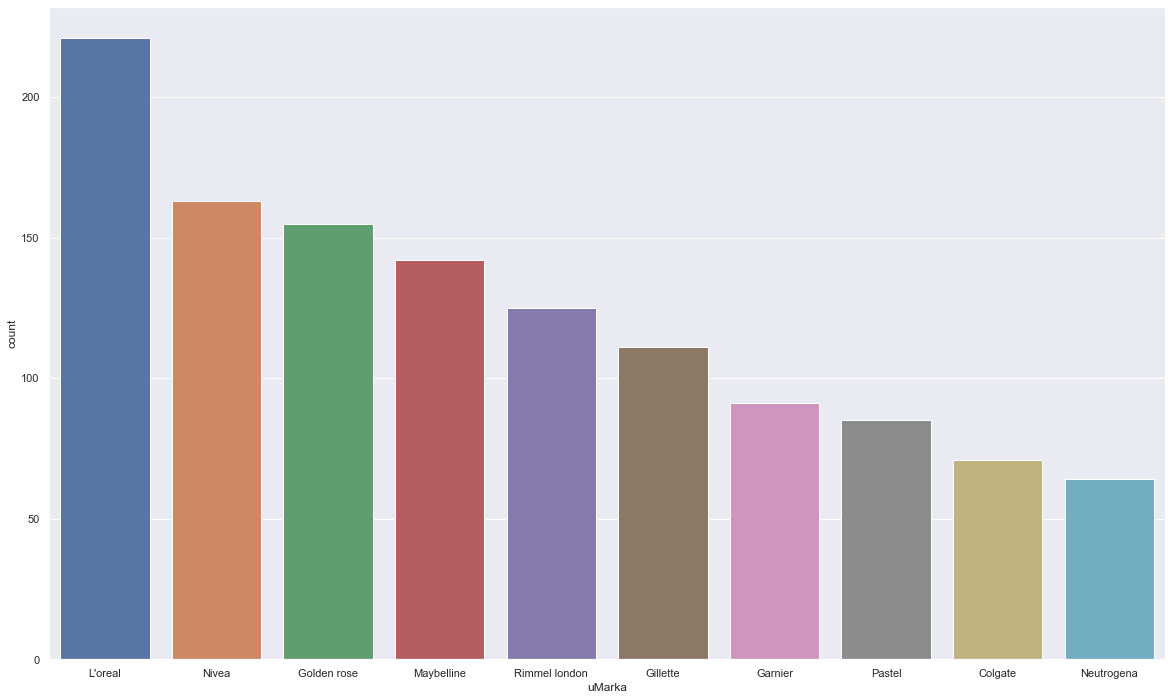

In [23]:
sns.set()
plt.figure(figsize=(20, 12))
sns.countplot(x='uMarka',data=kagitKozmetik,order=pd.value_counts(kagitKozmetik['uMarka']).iloc[:10].index)


### Aynı İsme Sahip Olan Ürünleri Listeleyelim

In [24]:
pd.value_counts(kagitKozmetik['urunAdi']).iloc[:3]

Elseve Arginine Direnç X3 Dökülme Karşıtı Şampuan 450 Ml - Migros    2
Balmy Banyo Lifi - Large - Migros                                    1
Pantene Saç Bakım Kremi Aqualight 470 Ml - Migros                    1
Name: urunAdi, dtype: int64

In [25]:
# 1 Tane çıktı. İsimleri aynı açıklamaları farklı.

In [26]:
kagitKozmetik[kagitKozmetik.urunAdi == "Elseve Arginine Direnç X3 Dökülme Karşıtı Şampuan 450 Ml - Migros"]

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunKategorileriSix,urunKategorileriSeven,urunAdi,urunAciklama,urunFoto,urunURL
103,L'oreal,"Kağıt, Kozmetik",Saç Bakım,Şampuan,NaN,NaN,NaN,NaN,Elseve Arginine Direnç X3 Dökülme Karşıtı Şampuan 450 Ml - Migros,"Elseve Arginine Direnç X3 Dökülme Karşıtı Şampuan Saçlar güçlenerek\nuzar. Saçı koparak dökülmeye karşı korur. Saç kökünü besler,\nenerji verir.&;nbsp; Saçın yeniden yapılandırılmasında rol oynayan en\nönemli aminoasitlerden biri olan Arginine mikro sirkülasyonu hızlandırarak,\nsaçı kökten uca beslemeye yardımcı olur. Saç Dökülmelerinde Gözle\nGörülür Azalma Bir müşteri, aynı gün içerisinde, bu üründen en\nfazla 3 adet sipariş verebilir. 3 adet üzerindeki siparişleri Migros Ticaret\nA.Ş iptal etme hakkını saklı tutar.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/34255777/34255777_urundetay-b75b44.jpg,https://www.migros.com.tr/elseve-arginine-direnc-x3-dokulme-karsiti-sampuan-450-ml-p-20ab3a1
104,L'oreal,"Kağıt, Kozmetik",Saç Bakım,Şampuan,NaN,NaN,NaN,NaN,Elseve Arginine Direnç X3 Dökülme Karşıtı Şampuan 450 Ml - Migros,"Saçın Yeniden Yapılandırılmasında Rol Oynayan En Önemli Aminoasitlerden\nBiri Olan Arginine Mikro Sirkülasyonu Hızlandırarak Saçı Kökten Uca Beslemeye\nYardımcı Olur. Saç Dökülmelerinde Gözle Görülür Azalma. Saçlar\ngüçlenerek uzar. Saçı dökülmeye karşı korur. Saç kökünü besler,\nenerji verir.&;nbsp; Bir müşteri, aynı gün içerisinde, bu\nüründen en fazla 3 adet sipariş verebilir. 3 adet üzerindeki siparişleri\nMigros Ticaret A.Ş iptal etme hakkını saklı tutar.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/34255782/34255782_etiket-cd0481.jpg,https://www.migros.com.tr/elseve-arginine-direnc-x3-dokulme-karsiti-sampuan-450-ml-p-20ab3a6


In [27]:
sutKahvalti=df[df["urunKategorileri"] == "Süt, Kahvaltılık"]

In [28]:
yumurta=sutKahvalti[sutKahvalti["urunKategorileriTwo"]=="Yumurta"]

In [29]:
yumurta.describe(include=['O'])

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunAdi,urunAciklama,urunFoto,urunURL
count,24,24,24,0,0,0,24,24,24,24
unique,12,1,1,0,0,0,24,24,24,24
top,Yumurtacım,"Süt, Kahvaltılık",Yumurta,NaN,NaN,NaN,Tire Organik Yumurta 10'lu M Boy (53-62) G - Migros,"Geniş gezinti alanına sahip, korunaklı kümeslerde özgürce dolaşan ve dış\nalana ulaşabilen yumurtacı tavuklardan elde edilen ürünlerdir. Pişirilerek tüketilmelidir. Satın aldıktan sonra buzdolabında/soğukta muhafaza ediniz. Güneşten\nuzak, serin ve kokusuz yerde, 18. günden sonra +5°C - +8°C sıcaklıkları\narasında saklanır.&;nbsp;&;nbsp;&;nbsp; İşletme Kayıt\nNo 45-0053 Kullanım\nÖnerileri Pişirilerek\ntüketilmelidir. Menşei TÜRKİYE İçindekiler %100\nYumurta Alerjen\nUyarısı Yumurta Saklama Koşulları Serin\nve Kuru ortamda muhafaza ediniz Gıda İşletmecisi / Üretici /\nİthalatçı / Dağıtıcı KESKİNOĞLU TAVUKÇULUK VE DAMIZLIK İŞLETMELERİ\nSAN. Ürün Bilgilerini Kullanma Hakkında İnternet\nsitemizde ve online satış kanallarımızda yer alan ürün etiket bilgileri,\nürünün tedarikçisi tarafından Migros Ticaret A.Ş.’ye iletilen en güncel\nbilgilerdir. Ürün etiket bilgileri ile internet sitemiz ve online satış\nkanallarımızda bulunan bilgiler arasında herhangi bir farklılık bulunması\nhalinde sorumluluk tamamen tedarikçi firmaya aittir.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/20001994/20001994-1e60db.jpg,https://www.migros.com.tr/raya-gezen-tavuk-yumurtasi-10lu-m-boy-p-13134d1
freq,7,24,24,NaN,NaN,NaN,1,1,1,1


In [30]:
yumurta.head(24)

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunKategorileriSix,urunKategorileriSeven,urunAdi,urunAciklama,urunFoto,urunURL
1125,Yumurtacım,"Süt, Kahvaltılık",Yumurta,NaN,NaN,NaN,NaN,NaN,Yumurtacım 6'lı M Boy Yumurta (53-62 G) - Migros,"Yumurtacım 6';lı M Boy Yumurta , besleyici yiyeceklerin\nbaşında gelen yumurtayı tüm tazeliği ve lezzeti ile sofralarınıza taşır. 6';lı\nşekilde satılan orta boy yumurtalar, haşlanarak, omlet ya da menemen şeklinde\nkeyifle tüketilebileceği gibi pek çok yemek tarifinin de olmazsa olmazı olur.\n İşletme Kayıt No TR03-0061 Kullanım\nÖnerileri RAFADAN:3,5 DK ALALOP: 5 DK KATI:10 DK TEFLON TAVADA: 4\nDK Menşei TÜRKİYE İçindekiler YUMURTA Saklama\nKoşulları Serin ve Kuru ortamda muhafaza ediniz Gıda\nİşletmecisi / Üretici / İthalatçı / Dağıtıcı KUMARTAŞLI GIDA VE\nNAKLİYE TİCARET SAN.LTD.ŞTİ. Ürün Bilgilerini Kullanma\nHakkında İnternet sitemizde ve online satış kanallarımızda yer\nalan ürün etiket bilgileri, ürünün tedarikçisi tarafından Migros Ticaret\nA.Ş.’ye iletilen en güncel bilgilerdir. Ürün etiket bilgileri ile internet\nsitemiz ve online satış kanallarımızda bulunan bilgiler arasında herhangi bir\nfarklılık bulunması halinde sorumluluk tamamen tedarikçi firmaya aittir.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/20001974/20001974-2d0663.jpg,https://www.migros.com.tr/yumurtacim-6li-m-boy-yumurta-53-62-g-p-13134b6
4808,Keskinoğlu,"Süt, Kahvaltılık",Yumurta,NaN,NaN,NaN,NaN,NaN,Keskinoğlu Free Range M 10'lu Yumurta - Migros,"Geniş gezinti alanına sahip, korunaklı kümeslerde özgürce dolaşan ve dış\nalana ulaşabilen yumurtacı tavuklardan elde edilen ürünlerdir. Pişirilerek tüketilmelidir. Satın aldıktan sonra buzdolabında/soğukta muhafaza ediniz. Güneşten\nuzak, serin ve kokusuz yerde, 18. günden sonra +5°C - +8°C sıcaklıkları\narasında saklanır.&;nbsp;&;nbsp;&;nbsp; İşletme Kayıt\nNo 45-0053 Kullanım\nÖnerileri Pişirilerek\ntüketilmelidir. Menşei TÜRKİYE İçindekiler %100\nYumurta Alerjen\nUyarısı Yumurta Saklama Koşulları Serin\nve Kuru ortamda muhafaza ediniz Gıda İşletmecisi / Üretici /\nİthalatçı / Dağıtıcı KESKİNOĞLU TAVUKÇULUK VE DAMIZLIK İŞLETMELERİ\nSAN. Ürün Bilgilerini Kullanma Hakkında İnternet\nsitemizde ve online satış kanallarımızda yer alan ürün etiket bilgileri,\nürünün tedarikçisi tarafından Migros Ticaret A.Ş.’ye iletilen en güncel\nbilgilerdir. Ürün etiket bilgileri ile internet sitemiz ve online satış\nkanallarımızda bulunan bilgiler arasında herhangi bir farklılık bulunması\nhalinde sorumluluk tamamen tedarikçi firmaya aittir.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/46051517/keskinoglu-free-range-m-10lu-yumurta-d58324.jpg,https://www.migros.com.tr/keskinoglu-free-range-m-10lu-yumurta-p-2beb0bd
1120,Raya,"Süt, Kahvaltılık",Yumurta,NaN,NaN,NaN,NaN,NaN,Raya Organik M Boy Yumurta 8'li (53 - 62 G) - Migros,"Raya Organik M Boy Yumurta,&;nbsp; doğal ortamda gezen\ntavukların yumurtalarından oluşur.&;nbsp;Orta boy yumurtalardan oluşan bu\npaket ile yumurta lezzetini her yerde güvenle\nkullanabilirsiniz.&;nbsp; Raya organik yumurta, organik tarım\nmüteşebbis sertifikasına sahiptir. Uygun saklama koşullarında üzerinde yazan\nson kullanma tarihine kadar tazeliğini kaybetmeden muhafaza\nedebilirsiniz.&;nbsp; Menşei TÜRKİYE Gıda\nİşletmecisi / Üretici / İthalatçı / Dağıtıcı ORNES GIDA PAZ.VE\nTİC.A.Ş. Ürün Bilgilerini Kullanma Hakkında İnternet\nsitemizde ve online satış kanallarımızda yer alan ürün etiket bilgileri,\nürünün tedarikçisi tarafından Migros Ticaret A.Ş.’ye iletilen en güncel\nbilgilerdir. Ürün etiket bilgileri ile internet sitemiz ve online satış\nkanallarımızda bulunan bilgiler arasında herhangi bir farklılık bulunması\nhalinde sorumluluk tamamen tedarikçi firmaya aittir.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/20000310/20000310-ca2c96.jpg,https://www.migros.com.tr/raya-organik-m-boy-yumurta-8li-53-62-g-p-13

In [31]:
def found_word_in_header(text):
    word = text.split(" ")
    if "a" in word:
        print(text)
    if "A" in word:
        print(text)
df["urunAdi"][df["urunKategorileri"]=="Ev, Pet"].apply(found_word_in_header)

298     None
3686    None
4620    None
3861    None
2937    None
        ... 
4631    None
3433    None
3665    None
322     None
4923    None
Name: urunAdi, Length: 3406, dtype: object

In [39]:
def get_last_category(df2):
    category = "" 
    for i in range(7, 0, -1):
        if str(df2[i]) != "nan" :
            category = df2[i]
            break
    return str(df2[8]) +" "+ str(category)

In [40]:
df["urunAdi"] = df.apply(get_last_category, axis=1)

In [32]:
df["urunAdi"] = df["urunAdi"].apply(clean_text)

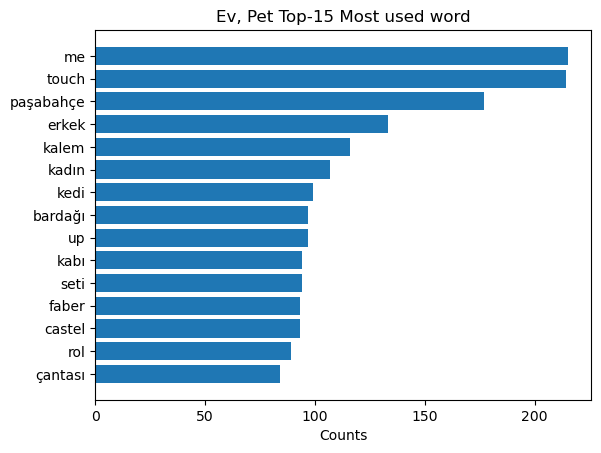

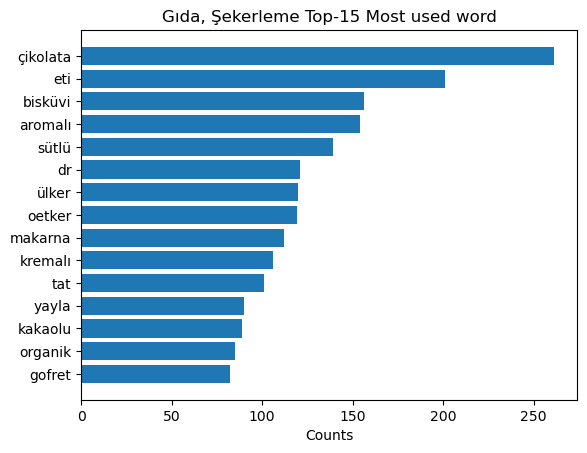

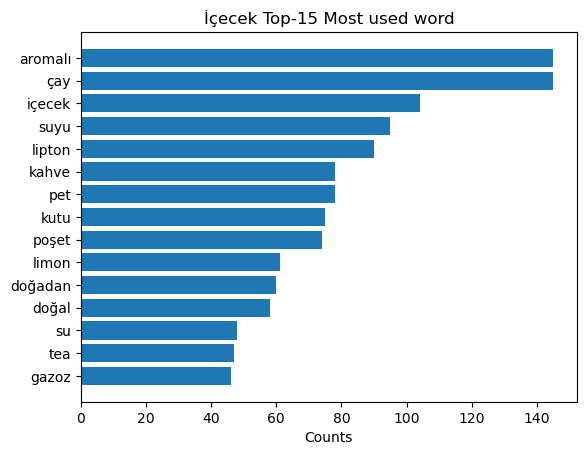

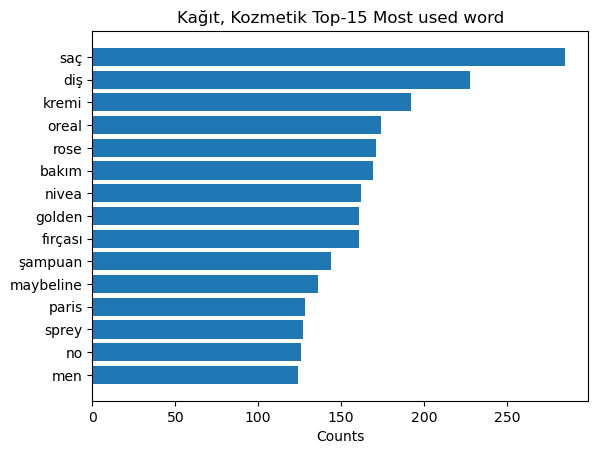

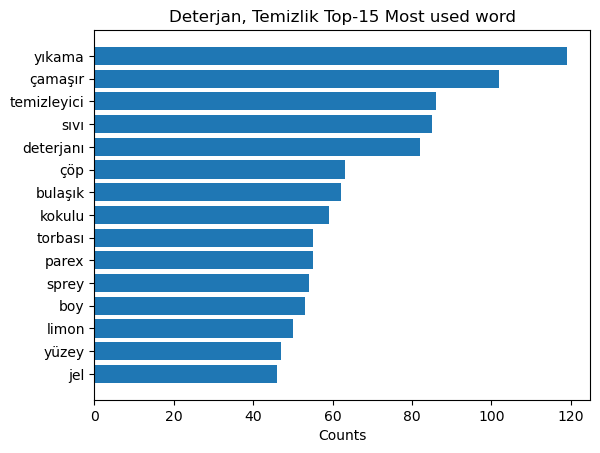

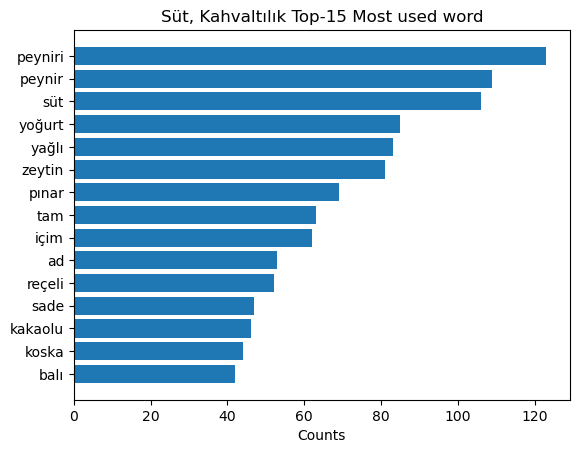

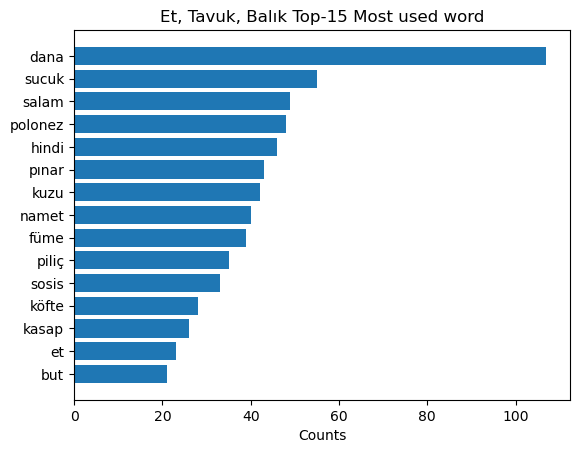

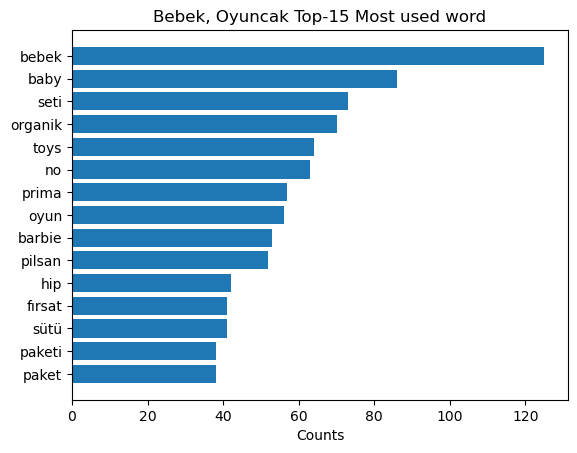

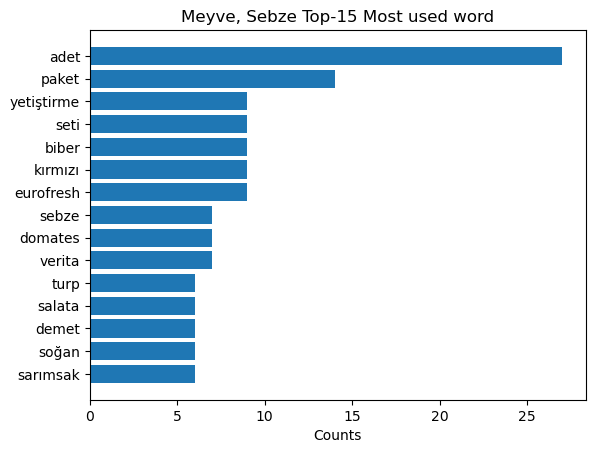

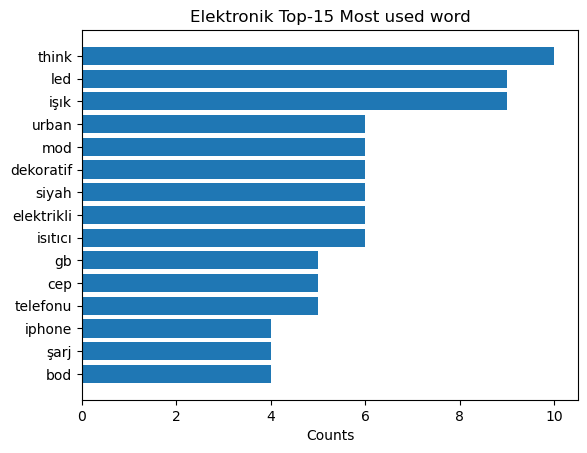

In [33]:
category_list = df['urunKategorileri'].unique().tolist()
for category in category_list:
    most_15_words(df["urunAdi"][df["urunKategorileri"]==category],category)

In [34]:
branch = df['uMarka'].unique().tolist()

In [35]:
len(branch)

1384